In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn')

# TASK: Read clubs stats and display.

In [2]:
# Read file csv to dataframe
table = pd.read_csv('DATA/TeamStats.csv')

In [3]:
table.Position = table.Position.astype('category')
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Position  20 non-null     category
 1   Club      20 non-null     object  
 2   Played    20 non-null     int64   
 3   Won       20 non-null     int64   
 4   Drawn     20 non-null     int64   
 5   Lost      20 non-null     int64   
 6   GF        20 non-null     int64   
 7   GA        20 non-null     int64   
 8   GD        20 non-null     int64   
 9   Points    20 non-null     int64   
dtypes: category(1), int64(8), object(1)
memory usage: 2.3+ KB


In [4]:
ordered = np.arange(20, 0, -1)
ordered

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1])

In [5]:
# Change oredered
table.Position.cat.set_categories(ordered, ordered=True, inplace=True)
table.Position

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Position, dtype: category
Categories (20, int64): [20 < 19 < 18 < 17 ... 4 < 3 < 2 < 1]

In [6]:
# print table
table

,Position,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,1,Liverpool,38,32,3,3,85,33,52,99
1,2,Manchester City,38,26,3,9,102,35,67,81
2,3,Manchester United,38,18,12,8,66,36,30,66
3,4,Chelsea,38,20,6,12,69,54,15,66
4,5,Leicester City,38,18,8,12,67,41,26,62
5,6,Tottenham Hotspur,38,16,11,11,61,47,14,59
6,7,Wolverhampton Wanderers,38,15,14,9,51,40,11,59
7,8,Arsenal,38,14,14,10,56,48,8,56
8,9,Sheffield United,38,14,12,12,39,39,0,54
9,10,Burnley,38,15,9,14,43,50,-7,54


Checking the correlation with the "Position" column

In [7]:
# table.corr(method='spearman')
table[['Position', 'Won', 'Drawn', 'Lost', 'GF', 'GA', 'GD', 'Points']].rank().corr()['Position']

Position    1.000000
Won        -0.975471
Drawn       0.058224
Lost        0.942333
GF         -0.868322
GA          0.890143
GD         -0.980451
Points     -0.998495
Name: Position, dtype: float64

So we have strongly correlated variables with the "Position" column. For example, as the "Wins" column get smaller, the "Position" column increases. This make sense as the best position is 1 and the worst position is 20.

In [8]:
table[['Position', 'Won', 'Drawn', 'Lost', 'GF', 'GA', 'GD', 'Points']].rank().corr()

,Position,Won,Drawn,Lost,GF,GA,GD,Points
Position,1.000000,-0.975471,0.058224,0.942333,-0.868322,0.890143,-0.980451,-0.998495
Won,-0.975471,1.000000,-0.206530,-0.864119,0.884403,-0.815645,0.959616,0.976941
Drawn,0.058224,-0.206530,1.000000,-0.196741,-0.267881,-0.180857,-0.067298,-0.065127
Lost,0.942333,-0.864119,-0.196741,1.000000,-0.771408,0.935875,-0.931025,-0.941110
GF,-0.868322,0.884403,-0.267881,-0.771408,1.000000,-0.634413,0.903687,0.868877
GA,0.890143,-0.815645,-0.180857,0.935875,-0.634413,1.000000,-0.886381,-0.883195
GD,-0.980451,0.959616,-0.067298,-0.931025,0.903687,-0.886381,1.000000,0.977411
Points,-0.998495,0.976941,-0.065127,-0.941110,0.868877,-0.883195,0.977411,1.000000


# TASK: Display goals scored and lost for all clubs.

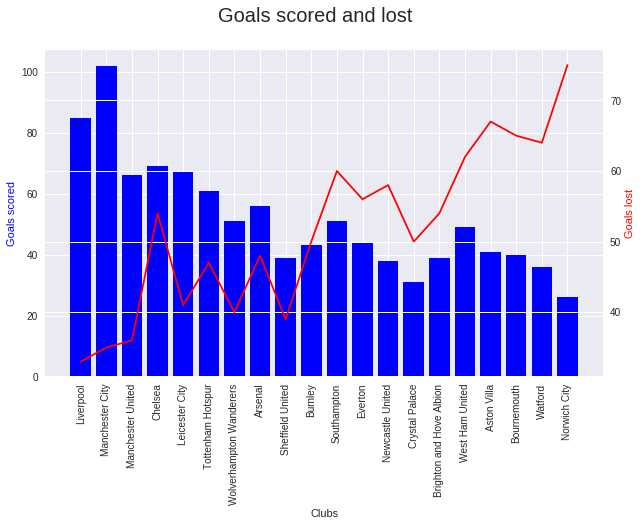

In [9]:
# get club names as list 
clubs = table.Club.tolist()

# add subplots (additional axis)
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()

# draw 
ax1.bar(clubs, table['GF'], color='b')
ax2.plot(clubs, table['GA'], 'r-')

# table title
fig.suptitle('Goals scored and lost', fontsize=20)

ax1.set_xlabel("Clubs")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Goals scored', color='b')
ax2.set_ylabel('Goals lost', color='r')

plt.show()

The most goals scored have Manchester City, which taking second place in the league. On the first place in goals lost is Norwich City.

# TASK: Display won and lost matches for clubs. 

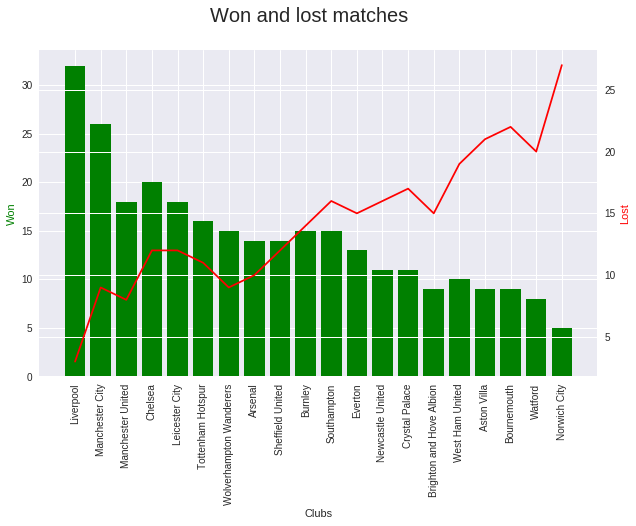

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(clubs, table['Won'], color='g')
ax2.plot(clubs, table['Lost'], 'r-')

# table title
fig.suptitle('Won and lost matches', fontsize=20)

ax1.set_xlabel("Clubs")
# set transformation for clubs name
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Won', color='g')
ax2.set_ylabel('Lost', color='r')

plt.show()

Liverpool have the most games won. Norwich City have the most games lost.

# TASK: Display lost matches and goals against for clubs

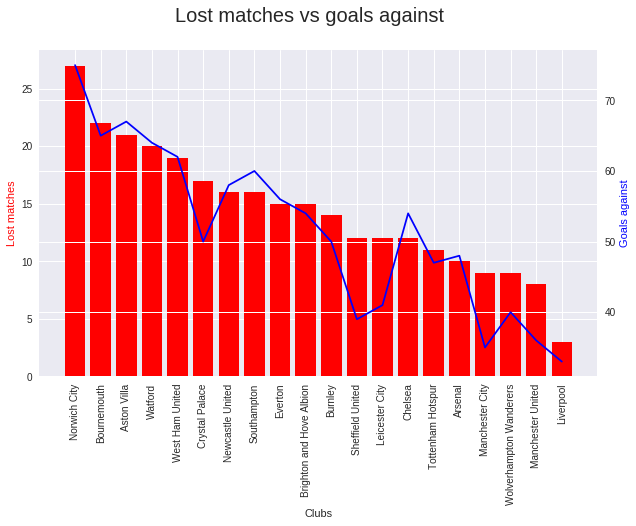

In [11]:
most_lost_clubs = table.sort_values(by='Lost', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(list(most_lost_clubs.Club), most_lost_clubs['Lost'], color='r')
ax2.plot(list(most_lost_clubs.Club), most_lost_clubs['GA'], 'b-')


# table title
fig.suptitle('Lost matches vs goals against', fontsize=20)

ax1.set_xlabel("Clubs")
# set transformation for clubs name
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Lost matches', color='r')
ax2.set_ylabel('Goals against', color='b')

plt.show()

The table shows the strong correlation between lost matches and goals. <br><br>Norwich City leads the statistics and places last in the table. Team who wins the last championship: Liverpool has the smallest number of goals against and lost matches.

# TASK: Display lost matches and goals for

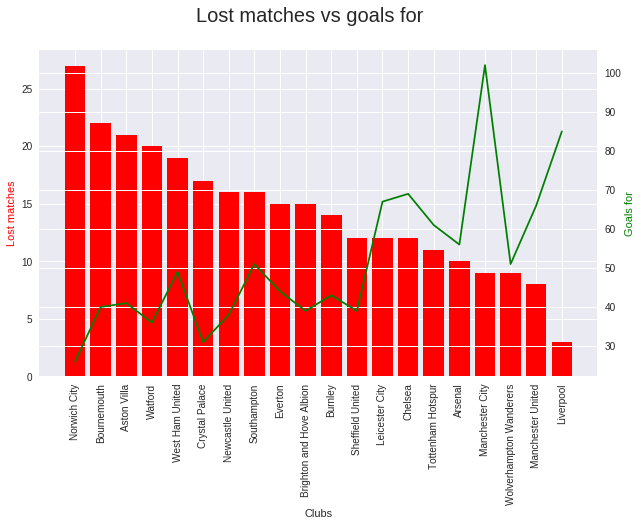

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(list(most_lost_clubs.Club), most_lost_clubs['Lost'], color='r')
ax2.plot(list(most_lost_clubs.Club), most_lost_clubs['GF'], 'g-')


# table title
fig.suptitle('Lost matches vs goals for', fontsize=20)

ax1.set_xlabel("Clubs")
# set transformation for clubs name
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Lost matches', color='r')
ax2.set_ylabel('Goals for', color='g')

plt.show()

The plot shows an interesting dependence that Manchester City has the most goals but has three times as many goals against as Liverpool. Such a detail decided about winning the champion of England. So Manchester City have a strong attack but a defense problem.

# TASK: Display won matches and goals for

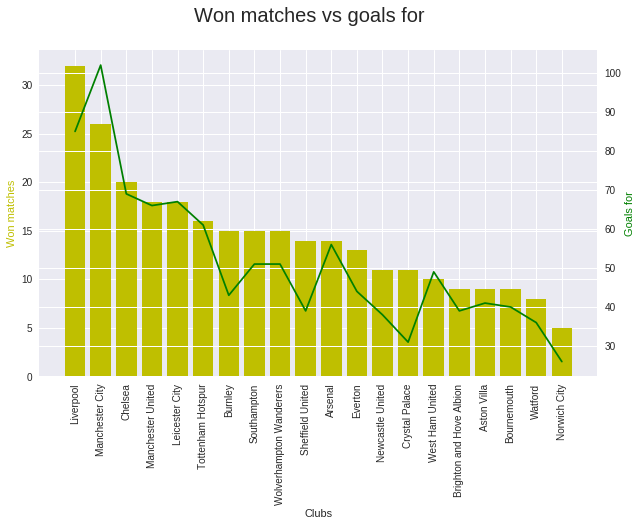

In [13]:
most_won_clubs = table.sort_values(by='Won', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(list(most_won_clubs.Club), most_won_clubs['Won'], color='y')
ax2.plot(list(most_won_clubs.Club), most_won_clubs['GF'], 'g-')


# table title
fig.suptitle('Won matches vs goals for', fontsize=20)

ax1.set_xlabel("Clubs")
# set transformation for clubs name
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Won matches', color='y')
ax2.set_ylabel('Goals for', color='g')

plt.show()

The same conclusions as above.

# TASK: Display won matches and goals against

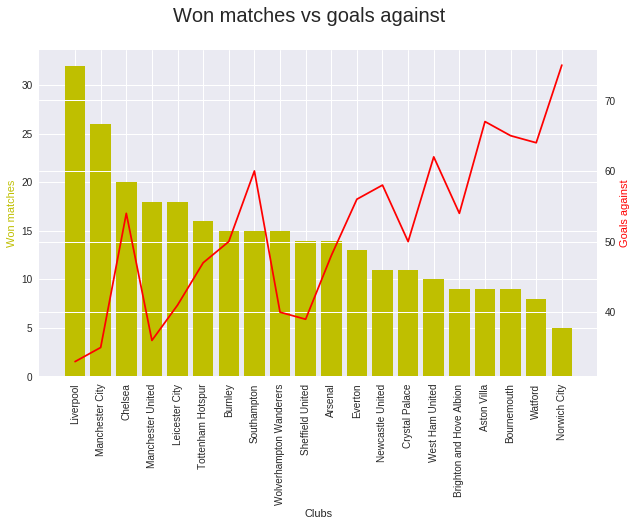

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(list(most_won_clubs.Club), most_won_clubs['Won'], color='y')
ax2.plot(list(most_won_clubs.Club), most_won_clubs['GA'], 'r-')


# table title
fig.suptitle('Won matches vs goals against', fontsize=20)

ax1.set_xlabel("Clubs")
# set transformation for clubs name`
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Won matches', color='y')
ax2.set_ylabel('Goals against', color='r')

plt.show()

The plot shows that Chelsea and Southampton have a defense problem. The have a lot of games won, but also a lot of goals against. 

# TASK: Display ten the most draw clubs.

In [15]:
# sort the table by the 'draw' column in descending order
draw_table = table.sort_values("Drawn", ascending = False)
# reset table indexes
draw_table.reset_index(drop=True, inplace=True)
# print table
draw_table[:10]

,Position,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,7,Wolverhampton Wanderers,38,15,14,9,51,40,11,59
1,8,Arsenal,38,14,14,10,56,48,8,56
2,15,Brighton and Hove Albion,38,9,14,15,39,54,-15,41
3,3,Manchester United,38,18,12,8,66,36,30,66
4,9,Sheffield United,38,14,12,12,39,39,0,54
5,6,Tottenham Hotspur,38,16,11,11,61,47,14,59
6,13,Newcastle United,38,11,11,16,38,58,-20,44
7,19,Watford,38,8,10,20,36,64,-28,34
8,12,Everton,38,13,10,15,44,56,-12,49
9,14,Crystal Palace,38,11,10,17,31,50,-19,43


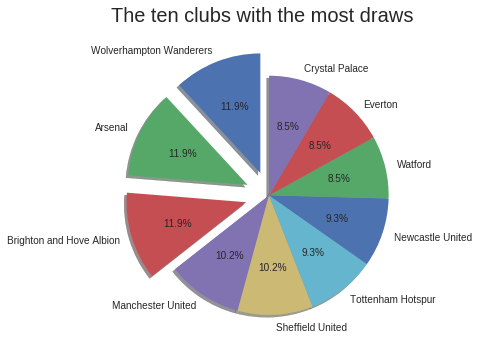

In [16]:
# DRAW PIE 

# labels is the name of ten the most tie clubs
labels = draw_table['Club'][:10]

# Variable sizes are the data that will be displayed on the pie
sizes = draw_table['Drawn'][:10]

# only "explode" the 1nd slice 
explode = (0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  

fig1, ax1 = plt.subplots()
fig1.suptitle('The ten clubs with the most draws', fontsize=20)

# settings of draw
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

Arsenal, Wolverhampton Wanderers, Brighton and Hove Albion are clubs, who have the most draw games.

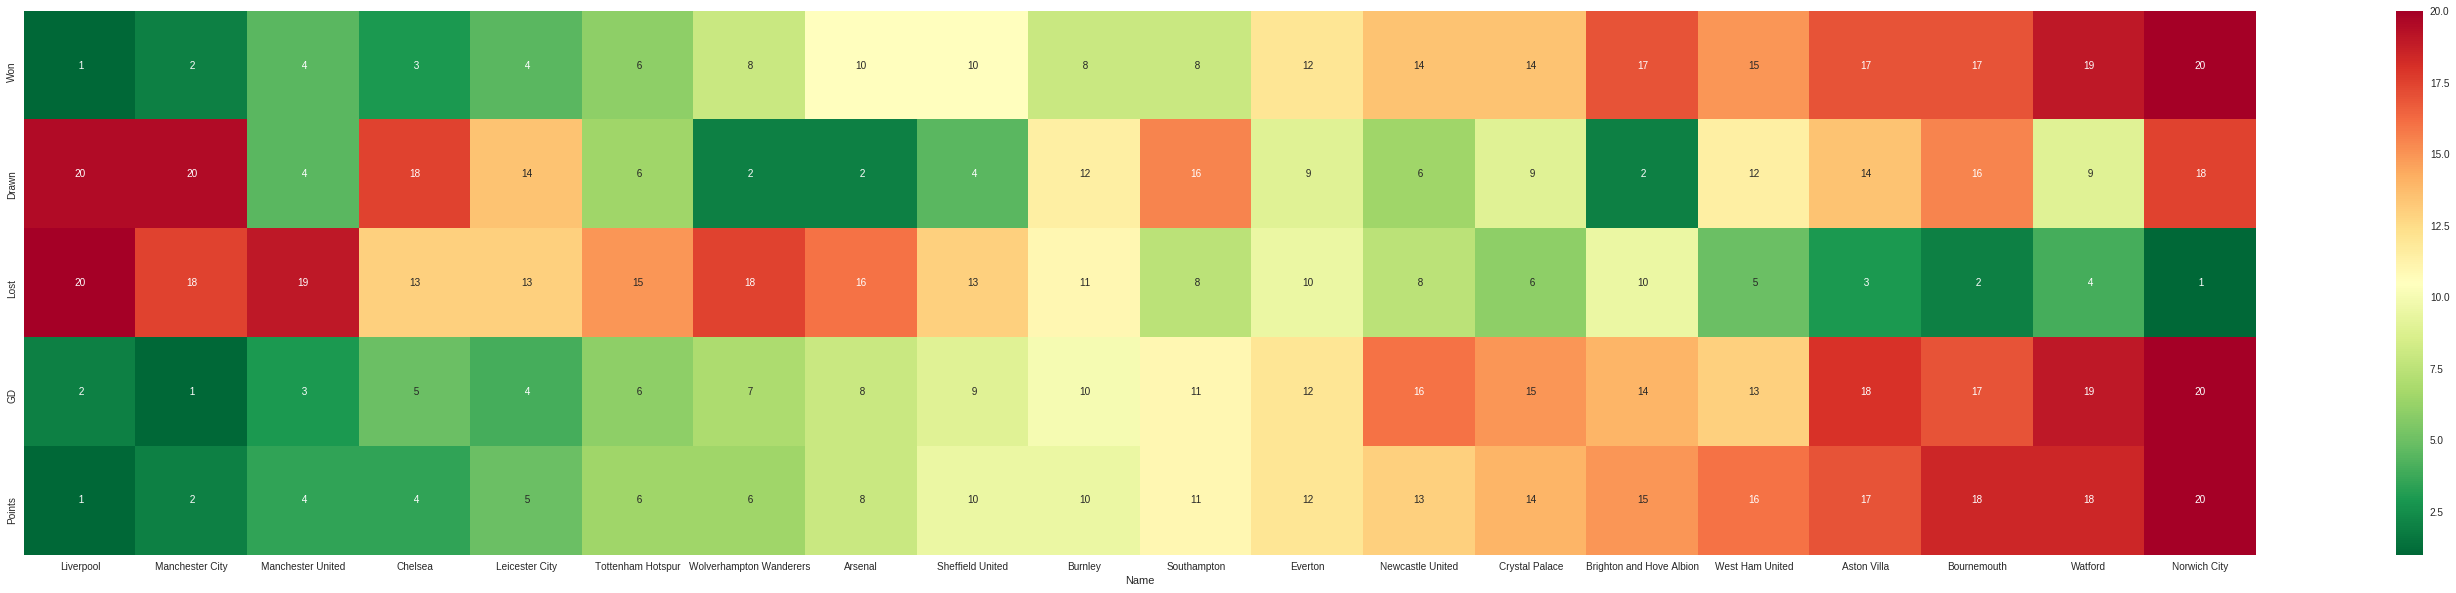

In [17]:
# TEST
ranks = table.iloc[:, 3:].rank(ascending=False)
ranks['Name'] = table['Club']
ranks = ranks.set_index('Name')
# ranks

plt.figure(figsize=(50, 10))
sns.heatmap(ranks[['Won', 'Drawn', 'Lost', 'GD', 'Points']].T, cmap='RdYlGn_r', annot=True, fmt='2.0f')
plt.show()


So the table shows that the difference in goals for and goals against, wins, draws, losses has a huge impact on the number of points. But the very interesting thing is that Chelsea have a high position despite having lost many games, but also having a small number of draws. This shows Chelsea's problem with goals against.

# TASK: Get statistics for all clubs and add to one file.

In [18]:
# load all files into one list

import glob

# path to clubs files
path = "DATA/clubs"

# get paths to all file in the folder
name_clubs = glob.glob(path + "/*.csv")

clubs = []
for club in name_clubs:
    # add colum 'club'
    club_data = pd.read_csv(club)
    club_data.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)
    club_data.columns = [col.strip() for col in club_data.columns]
    
    # Variable club is the full path to the file: '/home/lukas/Pulpit/Liga angielska/DANE/kluby/Crystal-Palace.csv'
    # Split the variable with '/', then get the last inxex element and cut the end of txt: '.csv'
    club = club.split('/')[-1][0:-4]
    if '-' in club:
        # replace the sign from 'Manchester-City' with 'Manchester City'
        club = club.replace('-', ' ')
    
    # add column: 'club'
    club_data['Club'] = club
    # add value to the list
    clubs.append(club_data)

In [238]:
# combine into one Dataframe 
players = pd.concat(clubs, ignore_index=True)
# replace the nan value to zero
players.fillna(0, inplace=True)
players

,Name,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Clean sheets,...,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Club
0,Rui Patrício,91.0,2.0,5.0,19.0,7.0,3.0,127.0,283.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Wolverhampton Wanderers
1,John Ruddy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Wolverhampton Wanderers
2,Will Norris,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Wolverhampton Wanderers
3,Matt Doherty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Wolverhampton Wanderers
4,Ryan Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Wolverhampton Wanderers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,Josh Brownhill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0%,1.0,Burnley
1101,Lukas Jensen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Burnley
1102,Bobby Thomas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Burnley
1103,Max Thompson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,Burnley


In [241]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1105 non-null   object 
 1   Saves                   1105 non-null   float64
 2   Penalties saved         1105 non-null   float64
 3   Punches                 1105 non-null   float64
 4   High Claims             1105 non-null   float64
 5   Catches                 1105 non-null   float64
 6   Sweeper clearances      1105 non-null   float64
 7   Throw outs              1105 non-null   float64
 8   Goal Kicks              1105 non-null   float64
 9   Clean sheets            1105 non-null   float64
 10  Goals conceded          1105 non-null   float64
 11  Errors leading to goal  1105 non-null   float64
 12  Own goals               1105 non-null   float64
 13  Yellow cards            1105 non-null   int64  
 14  Red cards               1105 non-null   

In [244]:
players.drop_duplicates(keep='first', inplace=True)

# TASK: Who is top scorer? List of the ten best-scoring players.

In [245]:
# get the columns: 'name', 'Goals', 'club' and sort the DataFrame by 'Goals' in descending order.
# Get the top 10 players.
top_scorer = players[['Name', 'Goals', 'Club' ]].sort_values('Goals',ascending=False).head(10)
top_scorer

,Name,Goals,Club
134,Jamie Vardy,23,Leicester City
753,Pierre-Emerick Aubameyang,22,Arsenal
855,Danny Ings,22,Southampton
423,Raheem Sterling,20,Manchester City
243,Mohamed Salah,19,Liverpool
86,Harry Kane,18,Tottenham Hotspur
242,Sadio Mané,18,Liverpool
21,Raúl Jiménez,17,Wolverhampton Wanderers
969,Anthony Martial,17,Manchester United
968,Marcus Rashford,17,Manchester United


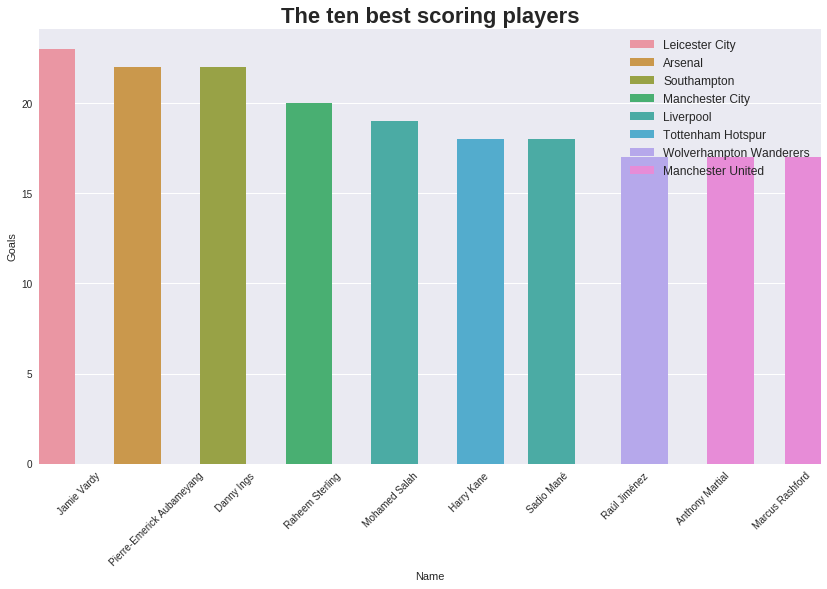

In [246]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(x="Name", y="Goals", hue='Club', data=top_scorer)
plt.title("The ten best scoring players", weight='bold', fontsize=22)

# set transformation
plt.xticks(rotation=45)
plt.legend(fontsize=12)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .60)
plt.show()


Jamie Vardy from Leicester City is best-scoring player.

# TASK: List of ten players who have assist the most.

In [247]:
# get the columns: 'name', 'Assists', 'club' and sort the DataFrame by 'Assists' in descending order.
# Get the top 10 players.
players_assist = players[['Name', 'Assists', 'Club' ]].sort_values('Assists',ascending=False).head(10)
players_assist

,Name,Assists,Club
411,Kevin De Bruyne,20,Manchester City
230,Trent Alexander-Arnold,13,Liverpool
227,Andrew Robertson,12,Liverpool
84,Son Heung-Min,10,Tottenham Hotspur
414,David Silva,10,Manchester City
243,Mohamed Salah,10,Liverpool
416,Riyad Mahrez,9,Manchester City
23,Adama Traoré,9,Wolverhampton Wanderers
241,Roberto Firmino,8,Liverpool
125,Harvey Barnes,8,Leicester City


<Figure size 1440x720 with 0 Axes>

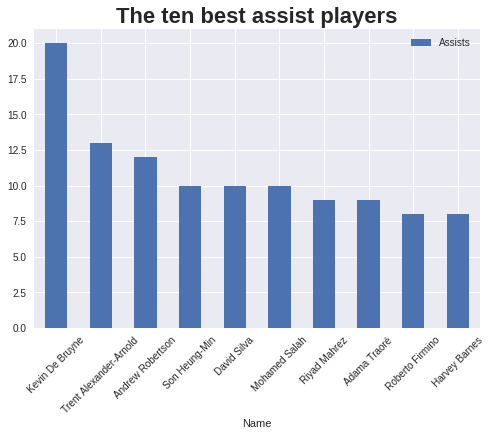

In [248]:
plt.figure(figsize=(20, 10))

_ = players_assist.plot(kind='bar', x="Name" )
plt.title("The ten best assist players", weight='bold', fontsize=22)

# set transformation
plt.xticks(rotation=45)
plt.show()

Kevin De Bruyne from Manchester City is best-assisting player.

# TASK: Display a comparision efficient for ten the most scoring players.

In [249]:
# get the columns: 'name', 'Shots', 'club' and sort the DataFrame by 'Shots' in descending order.
# Get the top 10 players.
players[['Name', 'Shots', 'Goals', 'Club' ]].sort_values('Goals',ascending=False).head(10)

,Name,Shots,Goals,Club
134,Jamie Vardy,89.0,23,Leicester City
753,Pierre-Emerick Aubameyang,93.0,22,Arsenal
855,Danny Ings,93.0,22,Southampton
423,Raheem Sterling,99.0,20,Manchester City
243,Mohamed Salah,132.0,19,Liverpool
86,Harry Kane,81.0,18,Tottenham Hotspur
242,Sadio Mané,77.0,18,Liverpool
21,Raúl Jiménez,118.0,17,Wolverhampton Wanderers
969,Anthony Martial,80.0,17,Manchester United
968,Marcus Rashford,95.0,17,Manchester United


In [250]:
# get a list of the top ten players scoring
shooter = players.sort_values('Goals', ascending=False)
# get a list of the players scoring more than 0 Goals and shots more than 0
shooter = shooter[(shooter.Goals > 0) & (shooter.Shots > 0) ]

# drop na
shooter.dropna(how='any', inplace=True)

In [251]:
# Players effectiveness is measured by dividing the number of goals by the number of shots. Round to two decimal places.
shooter['Efficient [%]'] = (shooter['Goals'] / shooter['Shots'] * 100).round(2)

In [252]:
# Get the columns
shooter_goals = shooter[['Name', 'Goals','Shots', 'Efficient [%]','Club' ]]
shooter_goals.head(10)

,Name,Goals,Shots,Efficient [%],Club
134,Jamie Vardy,23,89.0,25.84,Leicester City
753,Pierre-Emerick Aubameyang,22,93.0,23.66,Arsenal
855,Danny Ings,22,93.0,23.66,Southampton
423,Raheem Sterling,20,99.0,20.20,Manchester City
243,Mohamed Salah,19,132.0,14.39,Liverpool
86,Harry Kane,18,81.0,22.22,Tottenham Hotspur
242,Sadio Mané,18,77.0,23.38,Liverpool
21,Raúl Jiménez,17,118.0,14.41,Wolverhampton Wanderers
969,Anthony Martial,17,80.0,21.25,Manchester United
968,Marcus Rashford,17,95.0,17.89,Manchester United


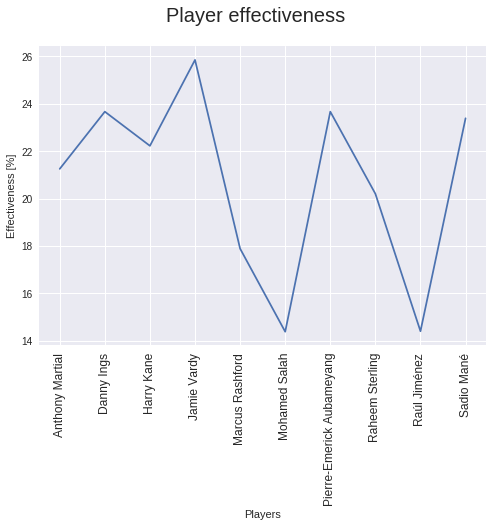

In [253]:
# Draw a plot
top_shooter_goals = shooter_goals.head(10)
result = top_shooter_goals['Efficient [%]']
name_palyers = top_shooter_goals['Name'].tolist()

sns.lineplot(x=name_palyers, y=result)
plt.xticks(name_palyers, rotation='vertical', size=12)
plt.ylabel("Effectiveness [%]")
plt.xlabel("Players")

plt.suptitle('Player effectiveness', fontsize=20)

plt.show()

Players effectiveness is measured by dividing the number of goals by the number of shots. 

From the ten most scoring players the most effectiveness player is Jamie Vardy and the worst effectiveness are Mohamed Salah and Raul Jimenez.

# TASK: Display the number of goals and shots.

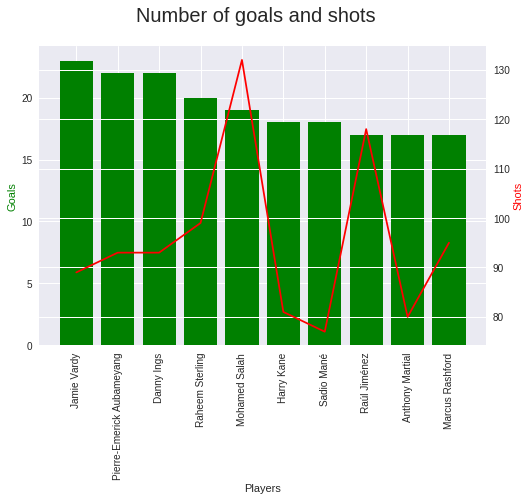

In [254]:
# Draw a plot with two axis
fig, ax1 = plt.subplots()

fig.suptitle('Number of goals and shots', fontsize=20)

ax2 = ax1.twinx()

ax1.bar(name_palyers, top_shooter_goals['Goals'], color='g')
ax2.plot(name_palyers, top_shooter_goals['Shots'], color='r')

ax1.set_xlabel("Players")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Goals', color='g')
ax2.set_ylabel('Shots', color='r')

plt.show()

In [255]:
top_scorer = shooter_goals.merge(table[['Club', 'Won', 'Lost', 'Drawn', 'Points' ]], on='Club')
top_scorer.head(10)

,Name,Goals,Shots,Efficient [%],Club,Won,Lost,Drawn,Points
0,Jamie Vardy,23,89.0,25.84,Leicester City,18,12,8,62
1,Ayoze Pérez,8,47.0,17.02,Leicester City,18,12,8,62
2,James Maddison,6,74.0,8.11,Leicester City,18,12,8,62
3,Harvey Barnes,6,61.0,9.84,Leicester City,18,12,8,62
4,Kelechi Iheanacho,5,36.0,13.89,Leicester City,18,12,8,62
5,Youri Tielemans,3,56.0,5.36,Leicester City,18,12,8,62
6,Demarai Gray,2,23.0,8.70,Leicester City,18,12,8,62
7,Wilfred Ndidi,2,26.0,7.69,Leicester City,18,12,8,62
8,Hamza Choudhury,1,7.0,14.29,Leicester City,18,12,8,62
9,Dennis Praet,1,16.0,6.25,Leicester City,18,12,8,62


# The most efficient players

In [256]:
top_scorer[top_scorer['Efficient [%]'] > 30]

,Name,Goals,Shots,Efficient [%],Club,Won,Lost,Drawn,Points
60,Steven Bergwijn,3,9.0,33.33,Tottenham Hotspur,16,11,11,59
80,Nemanja Matic,6,7.0,85.71,Manchester United,18,8,12,66
91,Jorginho,4,12.0,33.33,Chelsea,20,12,6,66
129,Dennis Srbeny,1,2.0,50.00,Norwich City,5,27,6,21
144,Chicharito,1,3.0,33.33,West Ham United,10,19,9,39
155,Florin Andone,1,1.0,100.00,Brighton and Hove Albion,9,15,14,41
172,Connor Wickham,1,3.0,33.33,Crystal Palace,11,17,10,43
181,Matthew Longstaff,2,4.0,50.00,Newcastle United,11,16,11,44


In [257]:
top_scorer[top_scorer['Efficient [%]'] < 10]

,Name,Goals,Shots,Efficient [%],Club,Won,Lost,Drawn,Points
2,James Maddison,6,74.0,8.11,Leicester City,18,12,8,62
3,Harvey Barnes,6,61.0,9.84,Leicester City,18,12,8,62
5,Youri Tielemans,3,56.0,5.36,Leicester City,18,12,8,62
6,Demarai Gray,2,23.0,8.70,Leicester City,18,12,8,62
7,Wilfred Ndidi,2,26.0,7.69,Leicester City,18,12,8,62
...,...,...,...,...,...,...,...,...,...
194,Philip Billing,1,33.0,3.03,Bournemouth,9,22,7,34
195,Ryan Fraser,1,27.0,3.70,Bournemouth,9,22,7,34
202,David McGoldrick,2,46.0,4.35,Sheffield United,14,12,12,54
203,Oliver Norwood,1,17.0,5.88,Sheffield United,14,12,12,54


The most efficient players have a small number of shots, which results in high efficiency.

In [258]:
top_scorer[top_scorer['Efficient [%]'] < 30].sort_values(by='Efficient [%]', ascending=False).head(50)

,Name,Goals,Shots,Efficient [%],Club,Won,Lost,Drawn,Points
48,Divock Origi,4,14.0,28.57,Liverpool,32,3,3,99
0,Jamie Vardy,23,89.0,25.84,Leicester City,18,12,8,62
78,Mason Greenwood,10,39.0,25.64,Manchester United,18,8,12,66
28,Michael Obafemi,3,12.0,25.00,Southampton,15,16,7,52
13,Gabriel Martinelli,3,12.0,25.00,Arsenal,14,10,14,56
53,Xherdan Shaqiri,1,4.0,25.00,Liverpool,32,3,3,99
119,Bernard,3,12.0,25.00,Everton,13,15,10,49
184,Valentino Lazaro,1,4.0,25.00,Newcastle United,11,16,11,44
138,Robert Snodgrass,5,21.0,23.81,West Ham United,10,19,9,39
23,Danny Ings,22,93.0,23.66,Southampton,15,16,7,52


In [259]:
# crate categorical variable
top_scorer['cat_efficient'] = pd.cut(top_scorer['Efficient [%]'], [0, 10, 20, 25, 30, 100], right=False, labels=['extremely small', 'small', 'medium', 'high', 'extremely high'])

In [260]:
top_scorer['cat_efficient'].value_counts()

extremely small    91
small              80
medium             19
high                8
extremely high      7
Name: cat_efficient, dtype: int64

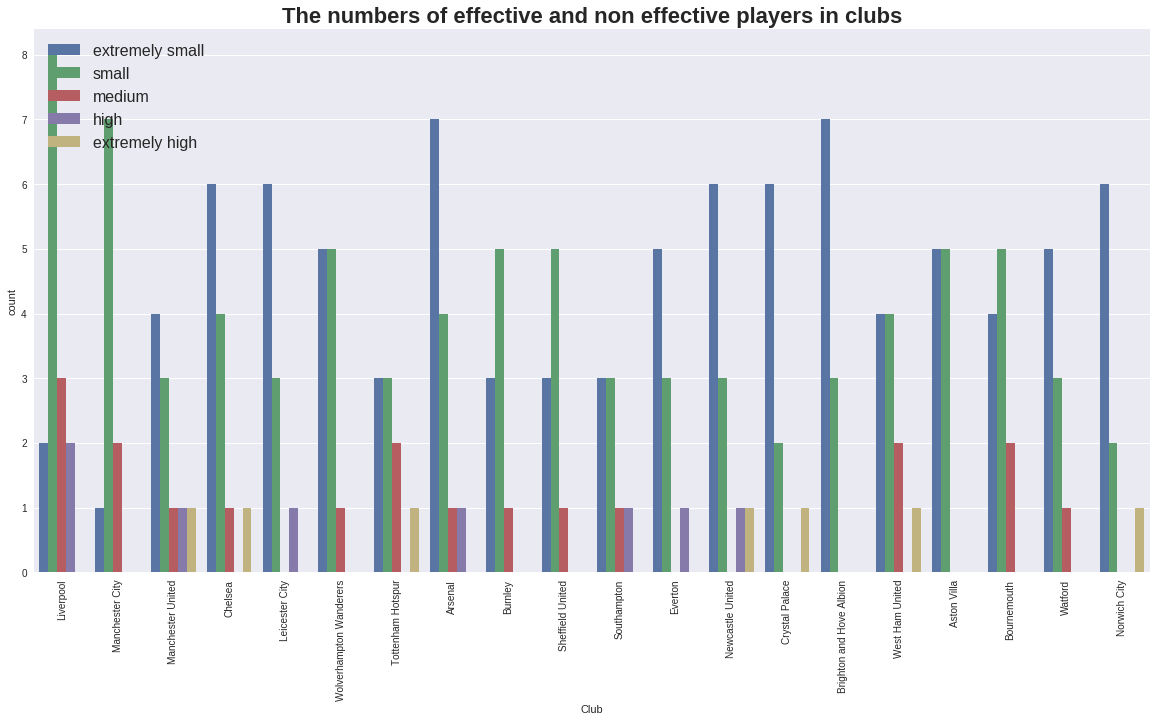

In [261]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Club',hue='cat_efficient', data=top_scorer.sort_values(by='Points', ascending=False))
plt.title("The numbers of effective and non effective players in clubs", weight='bold', fontsize=22)

# set transformation
plt.xticks(rotation=90)
plt.legend(fontsize=16)
plt.show()

In [262]:
# Clubs with the best scorers
dat = shooter1[shooter1['Goals'] > 9][['Name', 'Goals', 'Club']].merge(table[['Position', 'Club', 'Points']], on='Club')
dat.head()

,Name,Goals,Club,Position,Points
0,Jamie Vardy,23,Leicester City,5,62
1,Pierre-Emerick Aubameyang,22,Arsenal,8,56
2,Alexandre Lacazette,10,Arsenal,8,56
3,Danny Ings,22,Southampton,11,52
4,Raheem Sterling,20,Manchester City,2,81


No handles with labels found to put in legend.


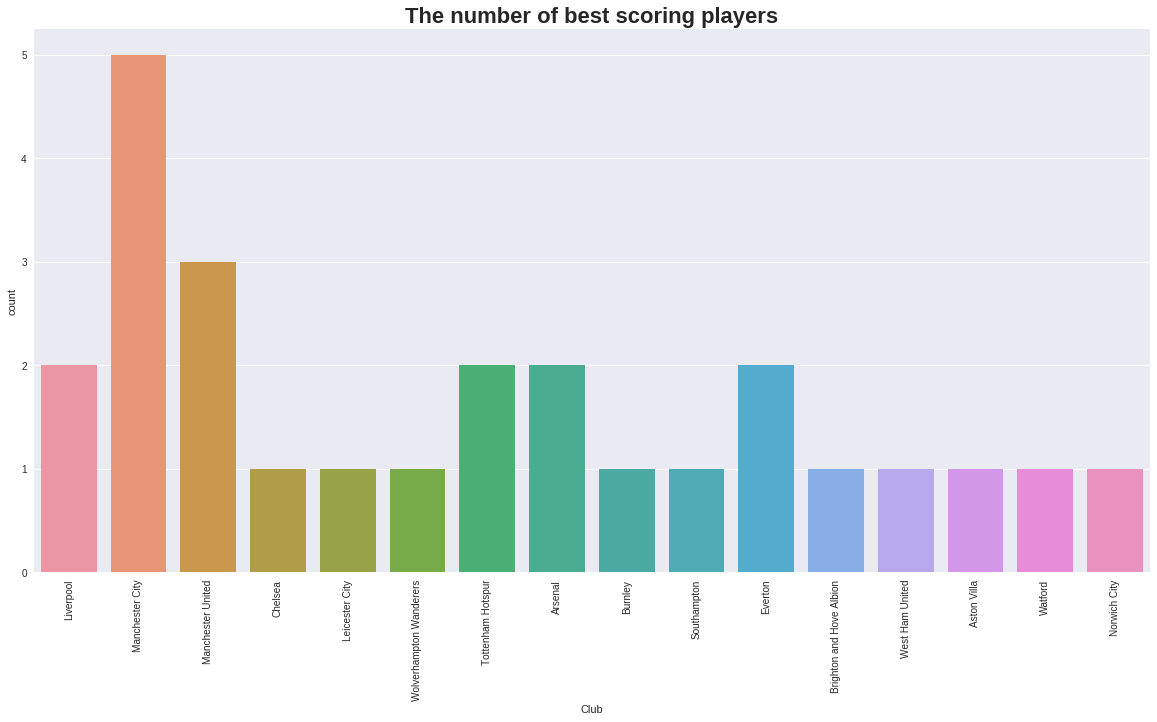

In [263]:
dat = dat.sort_values(by='Points', ascending=False)

plt.figure(figsize=(20, 10))
sns.countplot(x='Club', data=dat)
plt.title("The number of best scoring players", weight='bold', fontsize=22)

# set transformation
plt.xticks(rotation=90)
plt.legend(fontsize=16)
plt.show()

The clubs with the best scorers over 9 goals for are Manchester City 5 and Manchester United 3.

# TASK: Get players who have a yellow card and a red card [Show number of appearances] 

In [264]:
players[(players['Yellow cards'] > 0) & (players['Red cards'] > 0)][['Name', 'Yellow cards', 'Red cards','Appearances']]

,Name,Yellow cards,Red cards,Appearances
5,Willy Boly,1,1,22
17,Romain Saïss,10,1,33
70,Serge Aurier,2,1,33
115,Çaglar Söyüncü,4,1,34
117,Jonny Evans,8,1,38
131,Hamza Choudhury,2,1,20
177,John Egan,3,1,36
190,Billy Sharp,1,1,25
303,Séamus Coleman,3,1,27
309,Morgan Schneiderlin,4,1,15


# TASK: How many players does each club have?

No handles with labels found to put in legend.


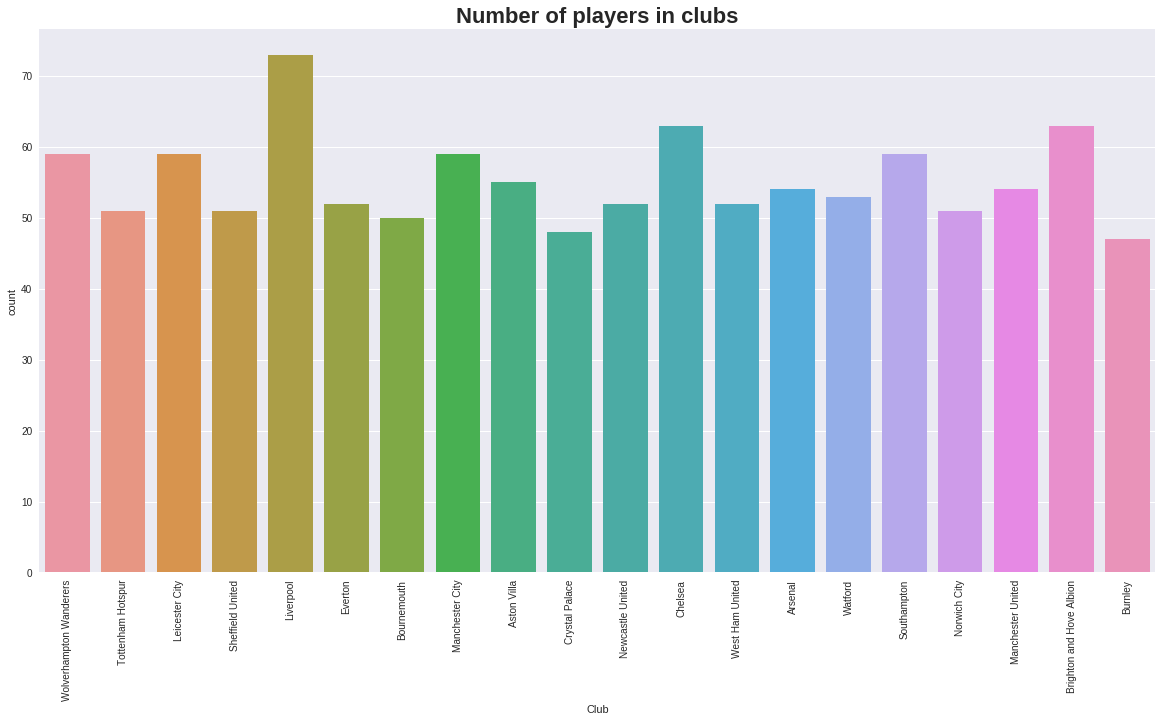

In [269]:
plt.figure(figsize=(20, 10))

sns.countplot(data=players, x = 'Club')
plt.title("Number of players in clubs", weight='bold', fontsize=22)

# set transformation
plt.xticks(rotation=90)
plt.legend(fontsize=16)
plt.show()

# TASK: Number of goals of each club. 

In [271]:
df = players.groupby('Club').sum().sort_values('Goals', ascending=False)['Goals']
df

Club
Manchester City             100
Liverpool                    93
Chelsea                      71
Manchester United            71
Leicester City               66
Arsenal                      59
Tottenham Hotspur            56
Aston Villa                  55
Southampton                  53
Wolverhampton Wanderers      50
West Ham United              49
Bournemouth                  46
Newcastle United             46
Everton                      43
Burnley                      41
Brighton and Hove Albion     36
Sheffield United             36
Watford                      35
Crystal Palace               31
Norwich City                 25
Name: Goals, dtype: int64

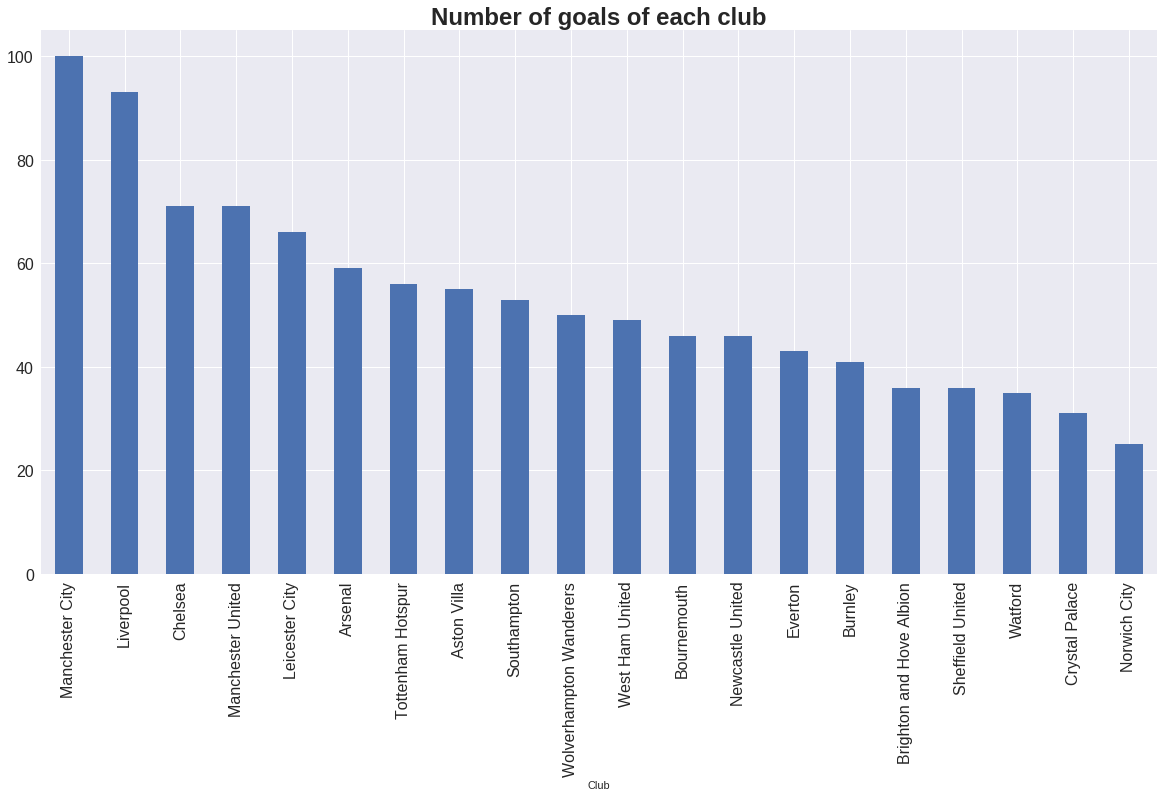

In [277]:
plt.figure(figsize=(20, 10))
df.plot(kind='bar', fontsize=16)
plt.title('Number of goals of each club', fontsize=24, weight='bold')
plt.show()